In [ ]:
# Fitting spacrtas

In [2]:
using Pkg; Pkg.activate(".")

 Activating new environment at `~/Work/surfascope-qed/notebooks/Project.toml`


In [3]:
using Distributions
using Optim
using Plots

# using ReverseDiff
# using ForwardDiff2
# using Statistics: mean

LoadError: ArgumentError: Package Distributions not found in current path:
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.


In [ ]:
# cell-title-toolbar
# cell-statusbar-container

In [1]:
default(size=(900,500))

LoadError: UndefVarError: default not defined

## Standard ways to fit spectra

Methods:
- [Levenberg–Marquardt algorithm](https://en.m.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)
- Monte Carlo

Mian applications:
- XPS spectra fitting (often augmented by the user)


Problems:
- ambiguity (two modes close to each other or just a single one)
- noise


Links:
- http://www.unm.edu/~kartyush/research_xps.xhtml
- https://hiphive.materialsmodeling.org/background/force_constants.html0
- https://en.m.wikipedia.org/wiki/Spectral_line_shape (Curve decomposition)
- 



## Generating IR spectra

Each vibrational mode can be modeled as a Lorentzian lineshape

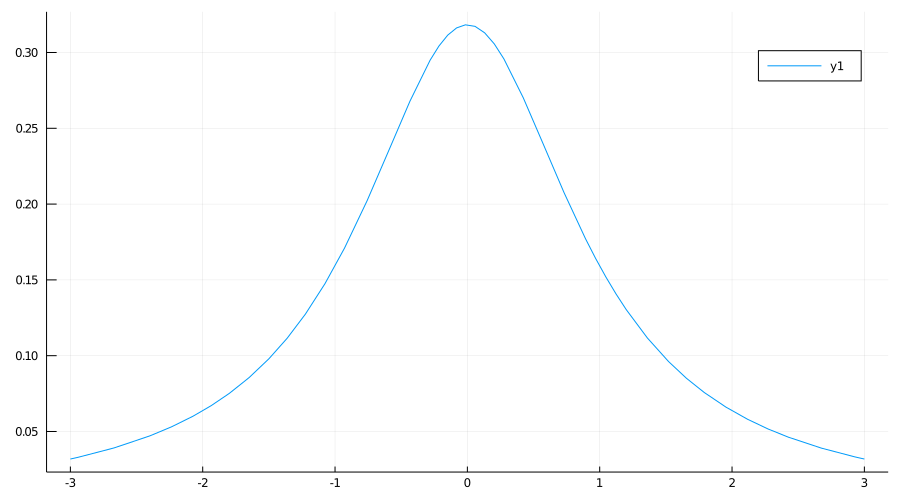

In [14]:
Lorentzian(x, μ, γ) = pdf(Cauchy(μ, γ), x)

# Exmaple
plot(x -> Lorentzian(x, 0., 1.), -3, 3)

In [43]:
λ = 21 # full width at half maximum (FWHM)

omega_list = [-82.24,36.21,60.81,140.78,163.63,274.45,283.11,307.31,404.79,425.93,434.44,476.51,477.99,552.77,654.57,681.73,683.61,712.24,758.11,781.49,789.45,833.64,857.18,861.26,903.60,936.59,991.55,1000.48,1006.77,1022.13,1031.83,1056.32,1056.87,1072.58,1127.87,1129.02,1176.64,1235.94,1249.09,1281.66,1284.36,1298.76,1303.98,1392.74,1406.87,1448.40,1506.12,1543.36,1571.74,1594.97,1613.92,1622.57,1636.00,2475.00,3190.29,3196.50,3198.04,3204.52,3213.83,3220.47,3225.37,3238.02,3241.27]
I_list = [0.000008,0.030176,0.001534,0.000470,0.000056,0.001375,0.001363,0.000420,0.000030,0.000052,0.000674,0.009810,0.017396,0.000405,0.000025,0.000155,0.000005,0.047113,0.006786,0.011121,0.068656,0.000227,0.022585,0.013127,0.013999,0.001712,0.000016,0.000252,0.000246,0.000230,0.000033,0.003466,0.013706,0.000058,0.004596,0.053038,0.003383,0.000012,0.005527,0.001129,0.001230,0.004929,0.000062,0.000027,0.004522,0.012094,0.002181,0.098959,0.004436,0.002117,0.003876,0.029548,0.000259,0.018330,0.004746,0.003968,0.013440,0.008591,0.024493,0.001818,0.000905,0.024476,0.002164];

The spectra can be modeled simply as a sum of the individual modes:

In [44]:
spectra(x) = sum(I * Lorentzian(x, ω, λ) for (I, ω) in zip(I_list, omega_list))

spectra (generic function with 1 method)

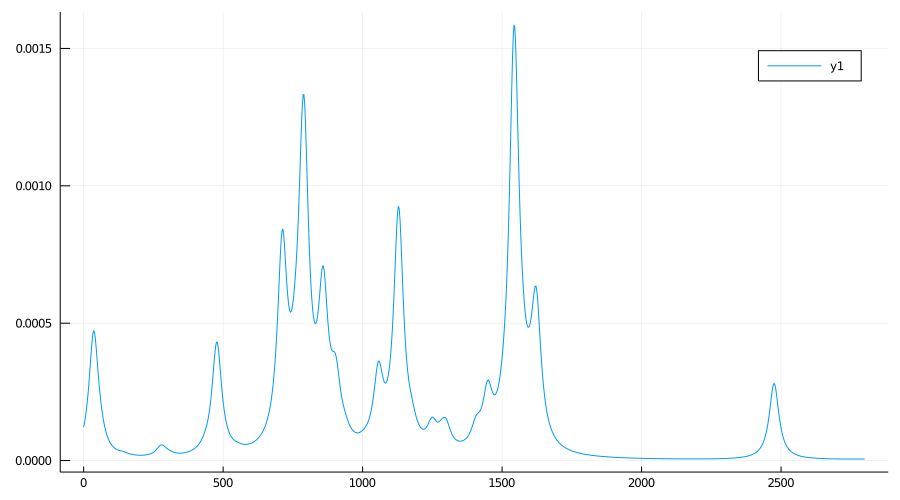

In [45]:
x = LinRange(0, 2800, 1001)
simulated_spectra = spectra.(x)
plot(x, simulated_spectra)

## Building and optimising the model to fit the spectra

### Fitting linewith

In [49]:
omega_list = [-82.24,36.21,60.81,140.78,163.63,274.45,283.11,307.31,404.79,425.93,434.44,476.51,477.99,552.77,654.57,681.73,683.61,712.24,758.11,781.49,789.45,833.64,857.18,861.26,903.60,936.59,991.55,1000.48,1006.77,1022.13,1031.83,1056.32,1056.87,1072.58,1127.87,1129.02,1176.64,1235.94,1249.09,1281.66,1284.36,1298.76,1303.98,1392.74,1406.87,1448.40,1506.12,1543.36,1571.74,1594.97,1613.92,1622.57,1636.00,2475.00,3190.29,3196.50,3198.04,3204.52,3213.83,3220.47,3225.37,3238.02,3241.27]
I_list = [0.000008,0.030176,0.001534,0.000470,0.000056,0.001375,0.001363,0.000420,0.000030,0.000052,0.000674,0.009810,0.017396,0.000405,0.000025,0.000155,0.000005,0.047113,0.006786,0.011121,0.068656,0.000227,0.022585,0.013127,0.013999,0.001712,0.000016,0.000252,0.000246,0.000230,0.000033,0.003466,0.013706,0.000058,0.004596,0.053038,0.003383,0.000012,0.005527,0.001129,0.001230,0.004929,0.000062,0.000027,0.004522,0.012094,0.002181,0.098959,0.004436,0.002117,0.003876,0.029548,0.000259,0.018330,0.004746,0.003968,0.013440,0.008591,0.024493,0.001818,0.000905,0.024476,0.002164];

In [50]:
model(x, λ) = sum(I * Lorentzian(x, ω, λ) for (I, ω) in zip(I_list, omega_list))
loss_fucntion(λ)= sum((simulated_spectra .- model.(x, λ)).^2)

loss_fucntion (generic function with 1 method)

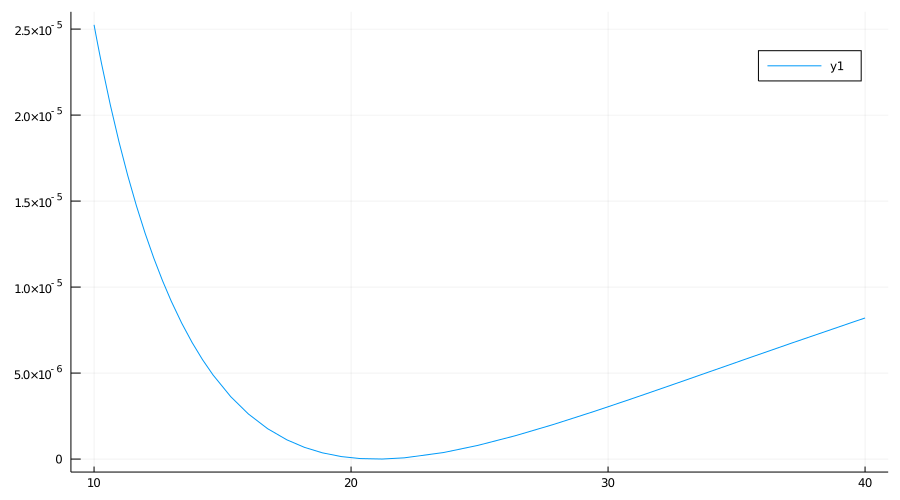

In [51]:
plot(loss_fucntion, 10., 40.)

In [52]:
λ_0 = 40.
result = optimize(loss_fucntion, [λ_0], LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     5.528498e-13

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.44e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.12e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.32e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.39e+04 ≰ 0.0e+00
    |g(x)|                 = 3.89e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    20
    ∇f(x) calls:   20


The value found durign the miniising the loss function:

In [53]:
λ′ = Optim.minimizer(result)[1]

21.002844361206595

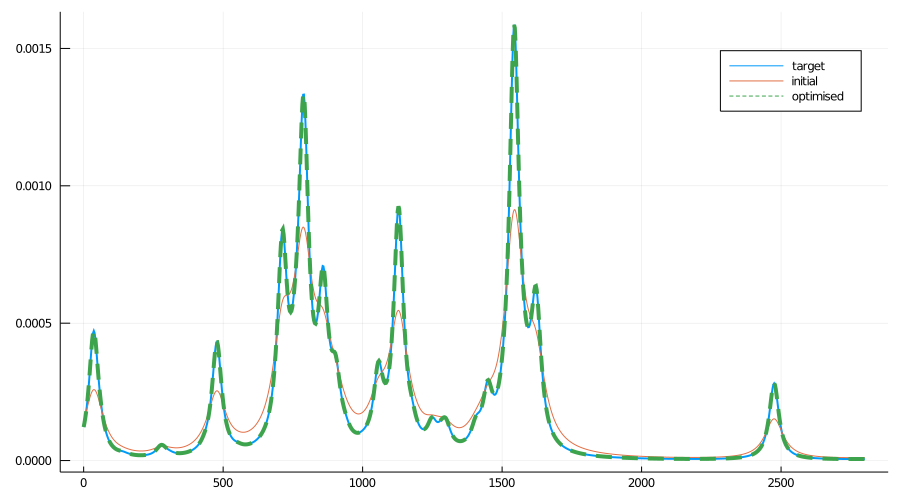

In [54]:
plot(x,simulated_spectra; linewidth = 2, label="target")
plot!(x, model.(x, λ_0); label="initial")
plot!(x, model.(x, λ′); linestyle = :dash, linewidth = 4, label="optimised")

### Optimizing intensities


Fitting the intensities for a slightly smaller region:

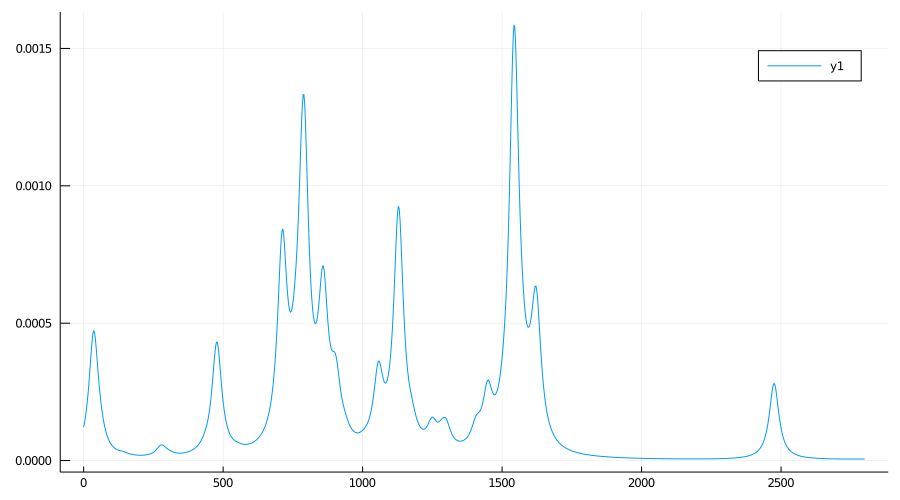

In [63]:
spectra(x) = sum(I * Lorentzian(x, ω, λ) for (I, ω) in zip(I_list, omega_list))
simulated_spectra = spectra.(x)
plot(x, simulated_spectra)

In [65]:
model(x, I_list) = sum(I * Lorentzian.(x, ω, λ) for (I, ω) in zip(I_list, omega_list))
loss_fucntion(I_list)= sum((simulated_spectra .- model(x, I_list)).^2)

loss_fucntion (generic function with 1 method)

In [67]:
I_list_0 = zeros(size(I_list))

63-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [68]:
result = optimize(loss_fucntion, I_list_0, LBFGS()) 

 * Status: success

 * Candidate solution
    Final objective value:     1.395904e-11

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 9.98e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.01e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.71e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.23e-02 ≰ 0.0e+00
    |g(x)|                 = 9.75e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   47  (vs limit Inf)
    Iterations:    92
    f(x) calls:    284
    ∇f(x) calls:   284


In [69]:
I_list_opt = Optim.minimizer(result)

63-element Array{Float64,1}:
 0.0004539210079054961 
 0.030154781096447588  
 0.001532889289056435  
 0.00046592351051391535
 5.369312819144353e-5  
 0.0013724667592895602 
 0.0013648983706401605 
 0.0004204412668095944 
 1.1502988437164502e-5 
 0.00014744031865971516
 0.0005642775548955893 
 0.011011621476060222  
 0.016212057994948303  
 ⋮                     
 0.029477259603123238  
 0.00028300150452103867
 0.018340130477003582  
 0.00941856824619184   
 0.009190329090984514  
 0.009135076783526482  
 0.008908224587288363  
 0.008597497644107353  
 0.00838617639598973   
 0.008235423781852888  
 0.007865354337227038  
 0.007774490680164646  

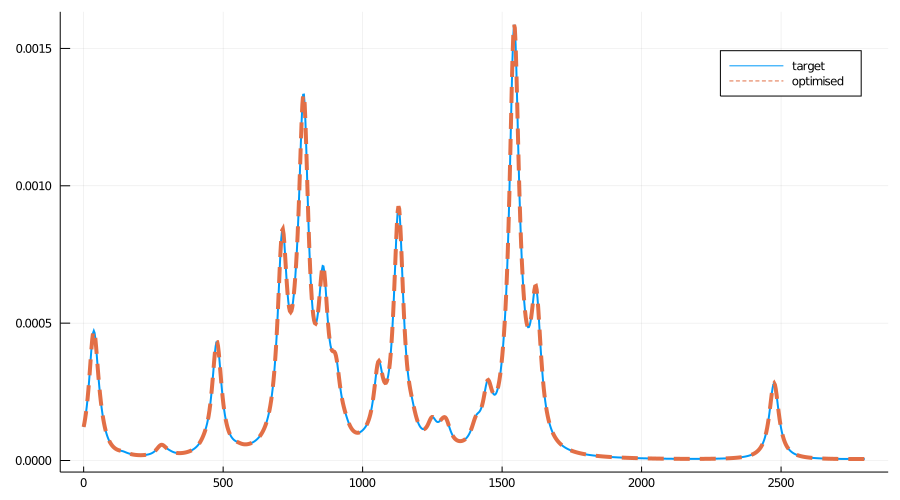

In [70]:
plot(x, simulated_spectra; linewidth = 2, label="target")

model_opt(x) = model(x, I_list_opt)
plot!(x, model_opt.(x); linestyle = :dash, linewidth = 4,label="optimised")

### Fitting all paramaters (WIP)

In [40]:
model(x, I_list, omega_list) = sum(I * Lorentzian(x, ω, λ) for (I, ω) in zip(I_list, omega_list))
loss_fucntion(params)= sum((simulated_spectra .- model(x, params)).^2)

loss_fucntion (generic function with 1 method)

In [41]:
result = optimize(x->loss_fucntion(x), I_list_0, LBFGS()) 

 * Status: success

 * Candidate solution
    Final objective value:     3.020502e-12

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.35e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.42e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.34e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.10e-02 ≰ 0.0e+00
    |g(x)|                 = 1.70e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    26
    f(x) calls:    84
    ∇f(x) calls:   84


In [42]:
Optim.minimizer(result)

21-element Array{Float64,1}:
  0.01112107213796563   
  0.06865593731049185   
  0.00022720759671351028
  0.022582943183467877  
  0.013129143042527684  
  0.013997835621571664  
  0.001716271969553355  
 -0.00014526067687055933
  0.0008081687973998588 
 -0.0003071070231514469 
  0.0005760973896900556 
 -0.00024109497266142275
  0.007882367931016408  
  0.009280592208793148  
  0.00015455318208013464
  0.004521508782446574  
  0.053108440941260944  
  0.003382572925122524  
  1.207030481681176e-5  
  0.005526950817475659  
  0.001128938069091312  

## Next steps

still missing: fitting all parameters at once

- very slow convergence at high dimensional case
  - utilasing localitly
- improving performance:
  - using derivatives for the optimalisation -> better performance
  - using automatic differentation (Reversediff or zygote or forwarddiff2)  
- robustness:
  - adding regulariasation term to the loss function
  - different lengthscales of the different paramenters (intensity, frequency, linewidth)

## (Obsolated) Lorentzian lineshape

In [72]:
"""
    Lorentz(μ, γ)

where
- μ is the the location parameter, specifying the location of the peak of the distribution,
- ``γ`` is the scale parameter which specifies the half-width at half-maximum (HWHM), alternatively ``2γ`` is full width at half maximum (FWHM) 

```math
f(x; \\mu, \\gamma) = \\frac{1}{1 + \\left(\\frac{x - \\mu}{\\sigma} \\right)^2} 
                    = \\frac{\\gamma ^{2}}{(x - x_{0})^{2} + \\gamma^{2}}
```
"""
struct Lorentz{T<:Real}
    μ::T
    γ::T
end

Lorentz(μ::T, γ::T) where {T<:Real} = Lorentz{T}(μ, γ)
Lorentz(μ::Real, γ::Real) = Lorentz(promote(μ, γ)...)
Lorentz(μ::Integer, γ::Integer) = Lorentz(float(μ), float(γ))
Lorentz(μ::T) where {T<:Real} = Lorentz(μ, one(T))
Lorentz() = Lorentz(0.0, 1.0)

params(d::Lorentz) = (d.μ, d.γ)

function (d::Lorentz)(x::Real)
    μ, γ =  params(d)
    return 1 / (1 + (((x - μ) / γ)^2))
end

In [ ]:
methods

In [73]:
?Lorentz()

```
Lorentz(μ, γ)
```

where

  * μ is the the location parameter, specifying the location of the peak of the distribution,
  * $γ$ is the scale parameter which specifies the half-width at half-maximum (HWHM), alternatively $2γ$ is full width at half maximum (FWHM)

$$
f(x; \mu, \gamma) = \frac{1}{1 + \left(\frac{x - \mu}{\sigma} \right)^2} 
                    = \frac{\gamma ^{2}}{(x - x_{0})^{2} + \gamma^{2}}
$$


In [74]:
f = Lorentz(1, 1)

Lorentz{Float64}(1.0, 1.0)

In [80]:
@edit Int(1)

Unknown editor: no line number information passed.
The method is defined at line 710.


In [79]:
@code_native debuginfo=:none f(1)

	.section	__TEXT,__text,regular,pure_instructions
	vcvtsi2sdq	%rsi, %xmm0, %xmm0
	vsubsd	(%rdi), %xmm0, %xmm0
	vdivsd	8(%rdi), %xmm0, %xmm0
	vmulsd	%xmm0, %xmm0, %xmm0
	movabsq	$5549029376, %rax       ## imm = 0x14ABF7800
	vmovsd	(%rax), %xmm1           ## xmm1 = mem[0],zero
	vaddsd	%xmm1, %xmm0, %xmm0
	vdivsd	%xmm0, %xmm1, %xmm0
	retq
	nopl	(%rax)


In [ ]:
plot(x->f(x), -3, 3)

##  (Obsolated) Vibrational mode representation

In [ ]:
"""
    LorentzMode(I, μ, γ)

where
- I is the intensity
- μ is the the location parameter, specifying the location of the peak of the distribution,
- ``γ`` is the scale parameter which specifies the half-width at half-maximum (HWHM), alternatively ``2γ`` is full width at half maximum (FWHM) 

```math
f(x; I, \\mu, \\gamma) = I \\frac{1}{1 + \\left(\\frac{x - \\mu}{\\sigma} \\right)^2} 
                    = I \\frac{\\gamma ^{2}}{(x - x_{0})^{2} + \\gamma^{2}}
```
"""
struct LorentzMode{T<:Real}
    I::T
    μ::T
    γ::T
end

LorentzMode(I::T, μ::T, γ::T) where {T<:Real} = LorentzMode{T}(I, μ, γ)
LorentzMode(I::Real, μ::Real, γ::Real) = LorentzMode(promote(I, μ, γ)...)
LorentzMode(I::Integer, μ::Integer, γ::Integer) = LorentzMode(float(I), float(μ), float(γ))

params(d::LorentzMode) = (d.I, d.μ, d.γ)

function (d::LorentzMode)(x::Real)
    I, μ, γ =  params(d)
    return I / (1 + (((x - μ) / γ)^2))
end

In [ ]:
?LorentzMode()

In [ ]:
LorentzMode(1,2,3.)

In [ ]:
LorentzMode(1,2,3)

In [ ]:
λ = 40 # full width at half maximum (FWHM)

I_list = [0.000008,0.030176,0.001534,0.000470,0.000056,0.001375,0.001363,0.000420,0.000030,0.000052,0.000674,0.009810,0.017396,0.000405,0.000025,0.000155,0.000005,0.047113,0.006786,0.011121,0.068656,0.000227,0.022585,0.013127,0.013999,0.001712,0.000016,0.000252,0.000246,0.000230,0.000033,0.003466,0.013706,0.000058,0.004596,0.053038,0.003383,0.000012,0.005527,0.001129,0.001230,0.004929,0.000062,0.000027,0.004522,0.012094,0.002181,0.098959,0.004436,0.002117,0.003876,0.029548,0.000259,0.018330,0.004746,0.003968,0.013440,0.008591,0.024493,0.001818,0.000905,0.024476,0.002164]
omega_list = [-82.24,36.21,60.81,140.78,163.63,274.45,283.11,307.31,404.79,425.93,434.44,476.51,477.99,552.77,654.57,681.73,683.61,712.24,758.11,781.49,789.45,833.64,857.18,861.26,903.60,936.59,991.55,1000.48,1006.77,1022.13,1031.83,1056.32,1056.87,1072.58,1127.87,1129.02,1176.64,1235.94,1249.09,1281.66,1284.36,1298.76,1303.98,1392.74,1406.87,1448.40,1506.12,1543.36,1571.74,1594.97,1613.92,1622.57,1636.00,2475.00,3190.29,3196.50,3198.04,3204.52,3213.83,3220.47,3225.37,3238.02,3241.27]

In [ ]:
modes = [LorentzMode(I, ω, 2λ) for (I, ω) in zip(I_list, omega_list)];

spectrum(x, m::LorentzMode) = m(x)
spectrum(x, m_list::Array{LorentzMode{T}}) where {T} = sum(m(x) for m in m_list)

In [ ]:
plot(x -> spectrum(x, modes[20]), 0, 3000)

In [ ]:
plot(x -> spectrum(x, modes), 0, 3000)

In [82]:
typeof(1//2)

Rational{Int64}

In [84]:
Lorentz(x::Rational{Int64})=1//2

Lorentz

In [85]:
Lorentz(1//4)

1//2